In [21]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [22]:
#Read csv with proper encoding
path = "Movie_Data.csv"
movies = pd.read_csv(path, encoding='latin1')
movies.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


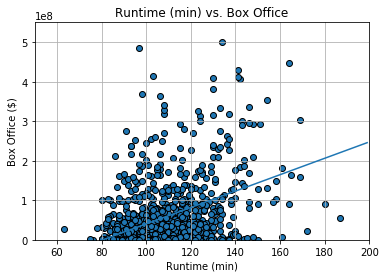

In [23]:
# Create a scatterplot for Runtime vs Box Office

plt.scatter(movies["Runtime (mins)"], movies["Box Office"], 
            marker = "o", edgecolors = "black")
plt.title("Runtime (min) vs. Box Office")
plt.xlabel("Runtime (min)")
plt.ylabel("Box Office ($)")
plt.xlim(50, 200)
plt.ylim(0, 550000000)
plt.grid(True)

# Linear Regression

x = np.arange(1, 200, 1)
regress_user = stats.linregress(movies['Runtime (mins)'], movies['Box Office'])
plt.plot(x, x * regress_user[0] + regress_user[1])


In [24]:
regress_user

LinregressResult(slope=2075040.3637465483, intercept=-167271758.52555242, rvalue=0.3908841253667198, pvalue=1.817947405216487e-38, stderr=153370.18061192226)

# Observations

 Small p-value indicates means the null hypothesis should be rejected.

In [ ]:
# Create bar chart with ranges of runtimes vs Box Office
bins = [0, 80, 100, 120, 140, 160, 180, 200]

# Create names for the bins
group_names = [" <80", "80-99", "100-119", "120-139", "140-159", "160-179", "180+" ]

# Create a DataFrame
movies["Runtime (mins)"] = pd.cut(movies["Runtime (mins)"], bins, labels = group_names)

movies_data_groupby = movies["Runtime (mins)"]
movies_data_groupby 

In [ ]:
# Merge 
test = pd.DataFrame(movies_data_groupby)

In [ ]:
join_df = test.merge(movies, on='Runtime (mins)', how='right')

In [ ]:
join_df.drop_duplicates(subset=None, keep="first", inplace=True)

In [ ]:
# Create DataFrame with columns to compare
final_df = join_df[["Runtime (mins)", "Box Office"]]

In [ ]:
groupby_run = final_df["Box Office"].groupby(final_df["Runtime (mins)"])
groupby_run.mean()

In [ ]:
testing = pd.DataFrame(groupby_run.mean())

In [ ]:
#Reset the index
testing = testing.reset_index()

In [ ]:
# Bar chart
plt.bar(testing["Runtime (mins)"], testing["Box Office"], color = "blue", alpha = 0.75, align = "center")
plt.title("Runtime (min) vs. Average Box Office")
plt.xlabel("Runtime (min)")
plt.ylabel("Box Office ($)")

# Observations

### Just describe what you see from the bar chart.